#**Advancing Diagnostics: Predicting Diabetes Onset with Deep Learning.**

*Made by Syed Ali Hamza Shah
(ID: 22102368)*

*MSc(AI) Birmingham City University*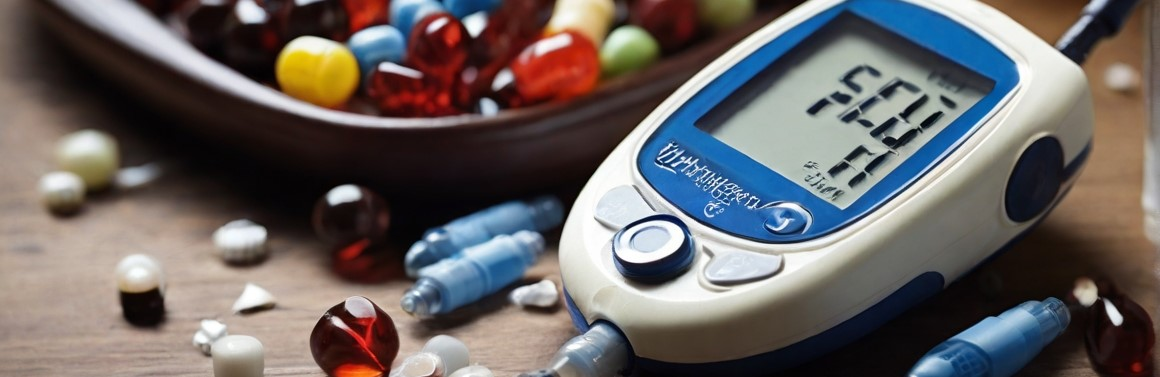

#Introduction

Diabetes is a pressing health concern nowadays. In order to address this issue this notebook aims to forecast the onset of diabetes using medical records from Pima Indians. The dataset includes patient histories and instances of diabetes within a five-year period. The objective is to fine-tune a neural network for precise predictions, playing a role in advancing medical diagnostics through deep learning.

#Import Libraries

In [2]:
# Data Manipulation and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Data Preprocessing and Splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Deep Learning Framework
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
# Evaluation Metrics
from sklearn import metrics
# Set Random Seeds for Reproducibility
import os
seed = 100
os.environ['PYTHONHASHSEED'] = str(seed)
keras.utils.set_random_seed(seed)
#Normalization Library
from sklearn.preprocessing import StandardScaler



#Data Loading

In [3]:
# Read the CSV file
train = pd.read_csv('/content/train.csv')

# Summarize the details
# print(f'Number of entries: {len(train)}')
train.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


#Exploratory Data Analysis (EDA)

Unveiling Patterns: Exploratory Data Analysis (EDA) in Diagnosing Diabetes from Pima Indian Medical Records.It compress of visualizing the data and cleaning it for the best prediction model.

Data file contain information on various attributes, each contributing to the overall dataset.The attributes provide essential information for both the training and testing datasets, offering insights into factors that may contribute to diabetes. The attributes and their details are as follows:

- A1: Number of times pregnant
- A2: Plasma glucose concentration measured two hours into an oral glucose tolerance test
- A3: Diastolic blood pressure in millimeters of mercury (mm Hg)
- A4: Triceps skin fold thickness in millimeters (mm)
- A5: 2-Hour serum insulin measured in micro International Units per milliliter (mu U/ml)
- A6: Body mass index (BMI) calculated as weight in kilograms divided by the square of height in meters
- A7: Diabetes pedigree function
- A8: Age in years


##Data Visualization

Gaining a comprehensive understanding of the data for improved data manipulation.

In [4]:
#Shows insights into the distribution of dataset
train.describe()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Provides a concise summary of the 'train' DataFrame,
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In this distribution, it is evident that there are 437 instances of individuals without diabetes (class 0) and 231 instances of individuals with diabetes (class 1).

0    437
1    231
Name: class, dtype: int64

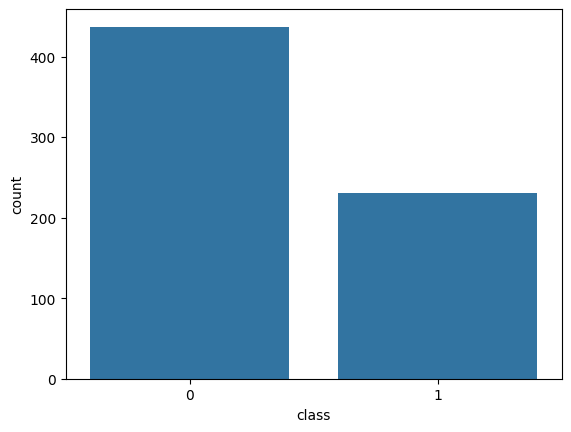

In [6]:
# Shows the distribution of classes in the 'class' column of the 'train'.
sns.countplot(x=train['class'])
train['class'].value_counts()

##Data Cleaning

To assess and address any missing values in the dataset, we employed this function. However, upon examination, it is evident that the dataset is nearly free of any such issues, indicating a relatively clean and complete dataset.

In [7]:
# Counts and displays the number of missing values in each column of the 'train' DataFrame.
train.isnull().sum()

id       0
A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
class    0
dtype: int64

# Model Prepration

In [8]:
# Creating the target variable 'y' and feature matrix 'X'.
y = train['class']
X = train.drop(['id', 'class'], axis=1)
print(X.head()) # Displaying the first few rows.

   A1   A2  A3  A4   A5    A6     A7  A8
0   6  148  72  35    0  33.6  0.627  50
1   1   85  66  29    0  26.6  0.351  31
2   8  183  64   0    0  23.3  0.672  32
3   1   89  66  23   94  28.1  0.167  21
4   0  137  40  35  168  43.1  2.288  33


#Model Training

In this notebook, we employed two distinct approaches. In the first category, only six features from the dataset were utilized, while in the second category, all eight features were considered.

##Category 1

We utilized six features for predicting the diabetes dataset, intentionally excluding the remaining two features in category 1. This approach allows us to examine the impact of using only six features. In category 2, we will incorporate all eight features to discern the differences between the two approaches.

In [9]:
# First six features (columns 0 to 5) from the original 'X'.
X1 = X.iloc[:, 0:6]
# Displaying the first few rows of the new DataFrame 'X1'.
X1.head()

,A1,A2,A3,A4,A5,A6
0,6,148,72,35,0,33.6
1,1,85,66,29,0,26.6
2,8,183,64,0,0,23.3
3,1,89,66,23,94,28.1
4,0,137,40,35,168,43.1


###Test and Validation Splitting

In [10]:
# Split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


###Normalization of Data

The normalization is applied because some features has absolute zero in the data like A4(Triceps skin fold thickness in millimeters (mm)) and A5(2-Hour serum insulin measured in micro International Units per milliliter (mu U/ml)).

Normalization is applied to ensure fair treatment of features with different scales in models. It's crucial when features like A4 and A5 have absolute zero values. Normalization facilitates algorithm convergence and improves model performance.

In [11]:
# Creating a StandardScaler object
scaler = StandardScaler()
# Scaling the training set 'X_train1'
X_train1_scaled = scaler.fit_transform(X_train1)
# Transforming the validation set 'X_val1' using the parameters learned from the training set
X_val1_scaled = scaler.transform(X_val1)


###Defining Neural Network

In [12]:
# define the keras model
model1 = keras.Sequential()
model1.add(layers.Dense(12, input_dim=6, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 197 (788.00 Byte)
Trainable params: 197 (788.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compailing Neural Network

In [13]:
# Compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

###Traing the Model

In [14]:
# Train model
history = model1.fit(X_train1_scaled, y_train1, batch_size=32, epochs=100, validation_data=(X_val1_scaled, y_val1))

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.6846 - accuracy: 0.6231 - val_loss: 0.6575 - val_accuracy: 0.6567
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6403 - val_loss: 0.6287 - val_accuracy: 0.6667
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.6531 - val_loss: 0.6050 - val_accuracy: 0.6716
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6158 - accuracy: 0.6638 - val_loss: 0.5837 - val_accuracy: 0.6766
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5996 - accuracy: 0.6617 - val_loss: 0.5655 - val_accuracy: 0.6866
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5860 - accuracy: 0.6724 - val_loss: 0.5495 - val_accuracy: 0.7015
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.6852 - val_loss: 0.5370 - val_accuracy: 0.7264
Epoch 8/100


In [15]:
# The 'history' object contains information about training metrics, including accuracy.
print(history.history['accuracy'])

[0.6231263279914856, 0.640256941318512, 0.6531049013137817, 0.6638115644454956, 0.6616702079772949, 0.6723768711090088, 0.6852248311042786, 0.6916488409042358, 0.7023554444313049, 0.7173447608947754, 0.7259100675582886, 0.7323340177536011, 0.7387580275535583, 0.7451820373535156, 0.7516059875488281, 0.7516059875488281, 0.7580299973487854, 0.7644539475440979, 0.7665953040122986, 0.7644539475440979, 0.7730192542076111, 0.7751606106758118, 0.7687366008758545, 0.7730192542076111, 0.7730192542076111, 0.7708779573440552, 0.7708779573440552, 0.7708779573440552, 0.7730192542076111, 0.7751606106758118, 0.7708779573440552, 0.7751606106758118, 0.7751606106758118, 0.7687366008758545, 0.7730192542076111, 0.7687366008758545, 0.7708779573440552, 0.7665953040122986, 0.7708779573440552, 0.7708779573440552, 0.7708779573440552, 0.7687366008758545, 0.7687366008758545, 0.7687366008758545, 0.7730192542076111, 0.7687366008758545, 0.7751606106758118, 0.7708779573440552, 0.7730192542076111, 0.7751606106758118, 

###Plot of Model Accuracy Over Epochs

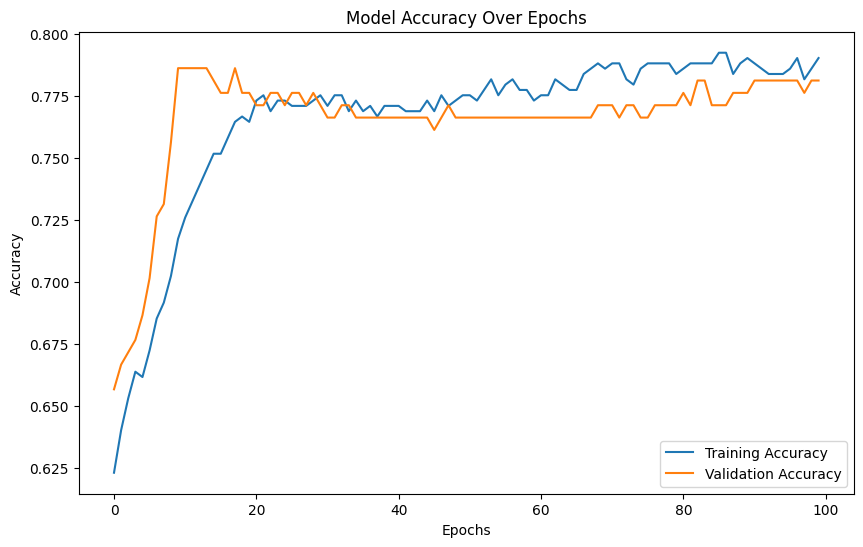

In [16]:
# Plotting Model Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# The 'history' object contains information about training metrics, including loss.
print(history.history['loss'])


[0.6846294403076172, 0.6560239195823669, 0.6346593499183655, 0.6158309578895569, 0.5996018052101135, 0.5859616994857788, 0.5743892192840576, 0.562999963760376, 0.5530235767364502, 0.5434620380401611, 0.535323977470398, 0.5273763537406921, 0.520621657371521, 0.5147541165351868, 0.5099577903747559, 0.5053352117538452, 0.501259446144104, 0.49810460209846497, 0.49524572491645813, 0.4927578866481781, 0.49043118953704834, 0.4886939227581024, 0.4867720305919647, 0.485052227973938, 0.4838917553424835, 0.4833962619304657, 0.48158225417137146, 0.4806254804134369, 0.47969087958335876, 0.47863081097602844, 0.477790892124176, 0.47702908515930176, 0.4762318730354309, 0.47549018263816833, 0.4746769964694977, 0.47436559200286865, 0.4733525216579437, 0.4728061258792877, 0.472043514251709, 0.47125887870788574, 0.4704314172267914, 0.46967580914497375, 0.46906253695487976, 0.4682326912879944, 0.46772247552871704, 0.4679648280143738, 0.46655359864234924, 0.46688297390937805, 0.4655313193798065, 0.464983344

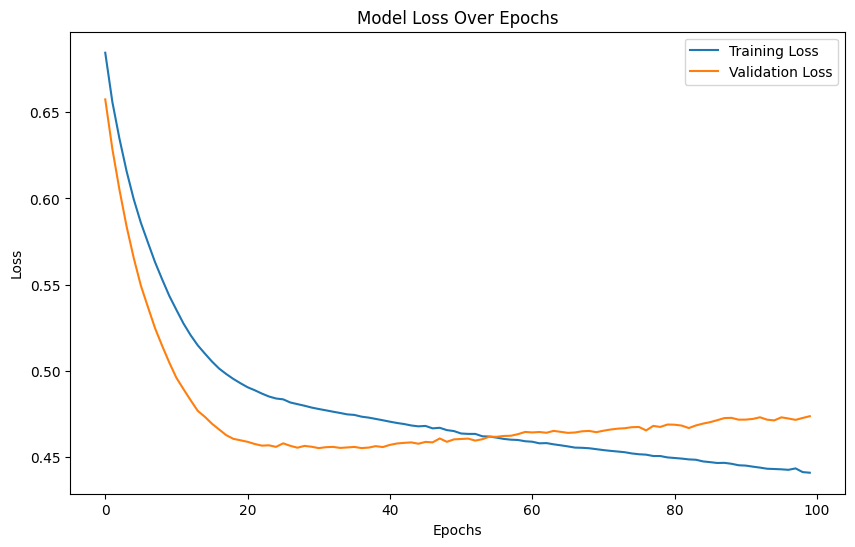

In [18]:
# Plotting Model Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Early Stopping for Category 1
Early stopping stops training when a monitored metric has stopped improving.

In [19]:
# Clear session
keras.backend.clear_session()
# Set random seed
keras.utils.set_random_seed(seed)

In [20]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [21]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train model with early stopping
history = model1.fit(X_train1_scaled, y_train1, batch_size=18, epochs=100, validation_data=(X_val1_scaled, y_val1), callbacks=[callback])

Epoch 1/100
26/26 [==============================] - 2s 20ms/step - loss: 0.4433 - accuracy: 0.7794 - val_loss: 0.4739 - val_accuracy: 0.7811
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 0.4406 - accuracy: 0.7880 - val_loss: 0.4749 - val_accuracy: 0.7811
Epoch 3/100
26/26 [==============================] - 0s 8ms/step - loss: 0.4399 - accuracy: 0.7880 - val_loss: 0.4753 - val_accuracy: 0.7811
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 0.4398 - accuracy: 0.7880 - val_loss: 0.4752 - val_accuracy: 0.7811


###Prediction

Based on Six features of the model this code provides the prediction.

In [22]:
# Get model predictions
y_pred1 = model1.predict(X_val1_scaled)
print(y_pred1[:10])

7/7 [==============================] - 0s 2ms/step
[[0.26183477]
 [0.22710268]
 [0.15028642]
 [0.03976806]
 [0.6955686 ]
 [0.03372495]
 [0.8284305 ]
 [0.2265485 ]
 [0.45335758]
 [0.20036393]]


In [23]:
# Categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]


In [24]:
# Measure accuracy on the validation set
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7810945273631841


###Loading the Test Data

Loading test data for comparing predictions from the validation set with the actual test data.

In [ ]:
test_df = pd.read_csv('/content/test.csv') #Loading the test data
print(f'Number of entries: {len(test_df)}')
test_df.head()

Number of entries: 100


,id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


In [ ]:
test = test_df.drop(['id'],axis=1) #drop the 'id' column from test data
test.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test.isnull().sum() # checking the null value in test data.

A1    0
A2    0
A3    0
A4    0
A5    0
A6    0
A7    0
A8    0
dtype: int64

In [ ]:
X_test1 = test.iloc[:, 0:6] # Selecting the 6 features for cateogry 1 test.
X_test1.head()

,A1,A2,A3,A4,A5,A6
0,6,98,58,33,190,34.0
1,9,154,78,30,100,30.9
2,6,165,68,26,168,33.6
3,1,99,58,10,0,25.4
4,10,68,106,23,49,35.5


In [ ]:
print(X_test1.shape) # shape of the x_test1

(100, 6)


In [ ]:
test_pred1 = model1.predict(X_test1) # Applied the predict model on X_test1

test_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in test_pred1]
print(test_pred_categorical1)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


##Category 2
In category 2, we are utilizing all eight features of the diabetes dataset, providing a comprehensive analysis of the model's performance with the complete set of features.

###Test and Validation Splitting

In [ ]:
# Split data to train and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train2)}')
print(f'validation data set size: {len(X_val2)}')

training data set size: 467
validation data set size: 201


###Normalization of Data

In [ ]:
X_train2_scaled = scaler.fit_transform(X_train2)
X_val2_scaled = scaler.transform(X_val2)

###Defining Neural Network

In [ ]:
# Define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(64, input_dim=8, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Compailing Neural Network

In [ ]:
# Compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#the shape of X_train2 and X_val2
print(X_train2.shape)
print(X_val2.shape)


(467, 8)
(201, 8)


###Traing the Model

In [ ]:
# train model
model2.fit(X_train2_scaled, y_train2, batch_size=8, epochs=60, validation_data=(X_val2_scaled, y_val2))

Epoch 1/60
59/59 [==============================] - 0s 5ms/step - loss: 0.0531 - accuracy: 0.9936 - val_loss: 1.1537 - val_accuracy: 0.7264
Epoch 2/60
59/59 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9914 - val_loss: 1.1912 - val_accuracy: 0.7214
Epoch 3/60
59/59 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9936 - val_loss: 1.1359 - val_accuracy: 0.7164
Epoch 4/60
59/59 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9914 - val_loss: 1.2266 - val_accuracy: 0.7015
Epoch 5/60
59/59 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9872 - val_loss: 1.1559 - val_accuracy: 0.7164
Epoch 6/60
59/59 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9893 - val_loss: 1.1844 - val_accuracy: 0.7164
Epoch 7/60
59/59 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9850 - val_loss: 1.2097 - val_accuracy: 0.7264
Epoch 8/60
59/59 [==

In [ ]:
test.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


###Early Stopping for category 2
Early stopping stops training when a monitored metric has stopped improving.

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
# define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(64, input_dim=8, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Early Stoping Compailing Neural Network

In [ ]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train model with early stopping
model2.fit(X_train2_scaled, y_train2, batch_size=32, epochs=20, validation_data=(X_val2_scaled, y_val2), callbacks=[callback])

Epoch 1/20
15/15 [==============================] - 1s 16ms/step - loss: 0.6578 - accuracy: 0.6167 - val_loss: 0.5889 - val_accuracy: 0.7015
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.5677 - accuracy: 0.7088 - val_loss: 0.5228 - val_accuracy: 0.7711
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.5221 - accuracy: 0.7345 - val_loss: 0.4878 - val_accuracy: 0.7761
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4980 - accuracy: 0.7537 - val_loss: 0.4653 - val_accuracy: 0.7811
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 0.4820 - accuracy: 0.7666 - val_loss: 0.4542 - val_accuracy: 0.7861
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7709 - val_loss: 0.4469 - val_accuracy: 0.7811
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4617 - accuracy: 0.7794 - val_loss: 0.4484 - val_accuracy: 0.7811
Epoch 8/20
15/15 [=

###Prediction

Based on the Category 2 the prediction of the dataset is in code below.

In [ ]:
# Predictions on the validation set
val_pred = model2.predict(X_val2_scaled)
val_pred_categorical = [1 if pred > 0.5 else 0 for pred in val_pred]

# Measure accuracy on the validation set
accuracy = metrics.accuracy_score(y_val2, val_pred_categorical)
print(f'Accuracy: {accuracy}')


7/7 [==============================] - 0s 2ms/step
Accuracy: 0.7960199004975125


In [ ]:
y_pred2 = model2.predict(X_val2_scaled)
print(y_pred2[:10])

7/7 [==============================] - 0s 2ms/step
[[0.19543561]
 [0.38822898]
 [0.11682755]
 [0.13948321]
 [0.65283465]
 [0.01545897]
 [0.8018655 ]
 [0.20037527]
 [0.5835226 ]
 [0.09241118]]


In [ ]:
X_test2 = test.iloc[:, 0:8] # Selecting the 6 features for cateogry 1 test.
X_test2.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
# Obtain predictions from the model for the 'test' dataset
test_pred2 = model2.predict(X_test2)
# Convert predictions to categorical labels based on a threshold (0.5 in this notebook)
test_pred_categorical2 = [1 if pred > 0.5 else 0 for pred in test_pred2]
# Print the first 10 categorical predictions
print(test_pred_categorical2[:10])

4/4 [==============================] - 0s 5ms/step
[0, 0, 0, 0, 1, 1, 1, 0, 1, 1]


#Conclusion




|Category | Features  | Batch | Epoch |  Accuracy |
|------|---------------|------------| ------------|------------|
|**1**    | 06   | 18 | 100 |78.10% |
|**2** | 08 | 32 |  20 |79.60% |


The accuracy comparison between Category 1 and Category 2 reveals that utilizing all features in the dataset results in a higher accuracy of 79.6%, overpowering the 78.1% accuracy achieved with only 6 features. Notably, an increase in batch size for Category 2 is observed, providing a comprehensive insight into the performance of the model .

This comparison underscores the impact of feature selection and batch size on model accuracy, highlighting the effectiveness of leveraging the entire dataset for improved performance.

#Submission

Converting the result in CSV file for submission of project.

In [ ]:
# Output Formatting
output_df = pd.DataFrame({'id': test_df['id'], 'prediction': y_pred_categorical1})
output_df.to_csv('predictions.csv', index=False)

In [ ]:
# Created by Hansi at 12/19/2022
import json


test_file_path = "/content/predictions.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': int(row['id']), 'prediction': int(row['prediction'])})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))